Clauder Noronha de Carvalho
Fonte: https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv

Estudo de caso

A elasticidade-preço da demanda ( PED ) é uma medida usada na economia para mostrar a capacidade de resposta, ou elasticidade , da quantidade demandada de um bem ou serviço a uma mudança de preço quando nada além do preço muda. Mais precisamente, fornece a variação percentual na quantidade demandada em resposta a uma variação de um por cento no preço.

Em economia, a elasticidade é uma medida de quão sensível é a demanda ou a oferta ao preço.

No marketing, é como os consumidores são sensíveis a uma mudança no preço de um produto.

>Dá respostas a perguntas como:

"Se eu abaixar o preço de um produto, quanto mais venderemos?"
"Se eu aumentar o preço de um produto, como isso afetará as vendas dos outros produtos?"

"Se o preço de mercado de um produto cair, quanto isso afetará a quantidade que as empresas estarão dispostas a fornecer ao mercado?"

Construiremos um modelo de regressão linear para estimar o PED e usaremos os modelos Stats do Python para estimar nossos modelos, bem como conduzir testes estatísticos e exploração de dados. Vamos começar!

In [8]:
!pip install statsmodels

In [16]:
%matplotlib inline
#from__future__import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
beef = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/beef.csv')

In [18]:
beef.head()

,Year,Quarter,Quantity,Price
0,1977,1,22.9976,142.1667
1,1977,2,22.6131,143.9333
2,1977,3,23.4054,146.5000
3,1977,4,22.7401,150.8000
4,1978,1,22.0441,160.0000


### Análise de regressão

Estimativa de mínimos quadrados ordinários (OLS)

In [19]:
beef_model = ols('Quantity ~ Price', data=beef).fit()
print(beef_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     811.2
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           1.69e-46
Time:                        22:50:59   Log-Likelihood:                -77.493
No. Observations:                  91   AIC:                             159.0
Df Residuals:                      89   BIC:                             164.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0515      0.413     72.701      0.0

## Observações:

1 - Os pequenos valores de P indicam que podemos rejeitar a hipótese nula de que o preço não afeta a quantidade.

2 - Altamente elevado ao quadrado indica que nosso modelo explica grande parte da variabilidade da resposta.

3 - Na análise de regressão, gostaríamos que nosso modelo de regressão tivesse variáveis ​​significativas e produzisse um alto valor ao quadrado do R.

4 - Mostraremos gráficos para ajudar a interpretar os resultados da análise de regressão de maneira mais intuitiva.

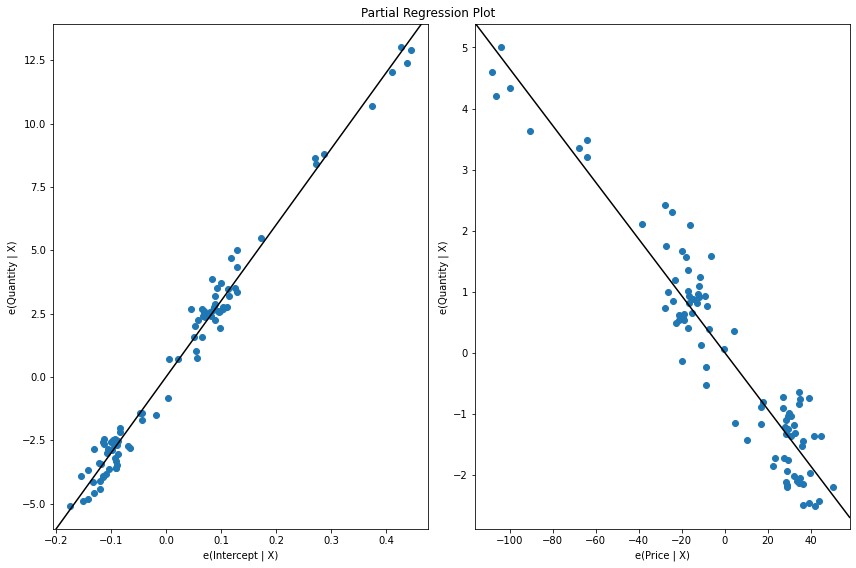

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(beef_model, fig=fig)

A tendência indica que as variáveis ​​preditoras (Preço) fornecem informações sobre a resposta (Quantidade), e os pontos de dados não se afastam mais da linha de regressão, e as previsões são muito precisas, dado um intervalo de previsão que se estende de 29 a 31.

### Gráficos Componente-Componente mais Residuais (CCPR)

O gráfico CCPR fornece uma maneira de julgar o efeito de um regressor na variável de resposta, levando em consideração os efeitos de outras variáveis ​​independentes.

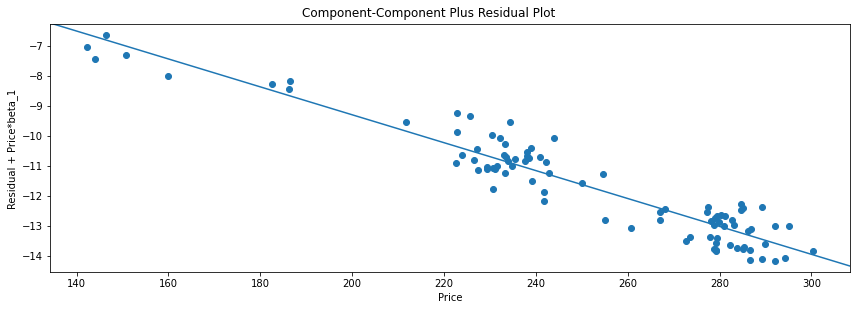

In [22]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr_grid(beef_model, fig=fig)

Como você pode ver, a relação entre a variação na Quantidade explicada pelo Preço é linear definida. Não há muitas observações que estão exercendo considerável influência sobre os relacionamentos.

### Gráficos de regressão

Usamos a função plot_regress_exog para verificar rapidamente as suposições do modelo em relação a um único regressor, neste caso, Price.

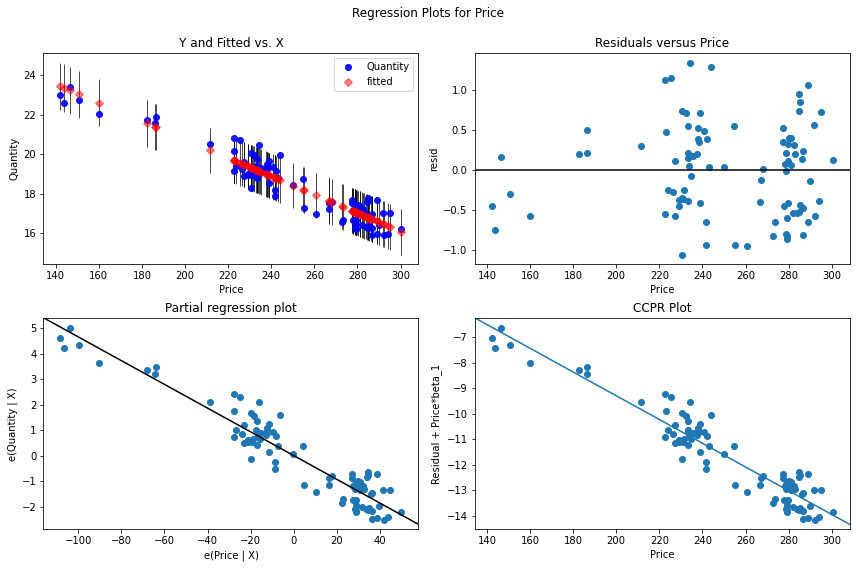

In [23]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(beef_model, 'Price', fig=fig)

### Mínimo quadrado recursivo (RLS)

Finalmente, aplicamos o filtro Recursive Least Square (RLS) para investigar a instabilidade dos parâmetros.
Antes da estimativa do RLS, manipularemos os dados e criaremos um índice de data e hora.

In [24]:
beef['Year'] = pd.to_datetime(beef['Year'], format="%Y")
from pandas.tseries.offsets import *
beef['Date'] = beef.apply(lambda x:(x['Year'] + BQuarterBegin(x['Quarter'])), axis=1)
beef.drop(['Year', 'Quarter'], axis=1, inplace=True)
beef.set_index('Date', inplace=True)
beef.head(10)

,Quantity,Price
Date,,
1977-03-01,22.9976,142.1667
1977-06-01,22.6131,143.9333
1977-09-01,23.4054,146.5000
1977-12-01,22.7401,150.8000
1978-03-01,22.0441,160.0000
1978-06-01,21.7602,182.5333
1978-09-01,21.6064,186.2000
1978-12-01,21.8814,186.4333
1979-03-01,20.5086,211.7000


### Estimativa de RLS

In [25]:
endog = beef['Quantity']
exog = sm.add_constant(beef['Price'])

mod = sm.RecursiveLS(endog, exog)
res = mod.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               Quantity   No. Observations:                   91
Model:                    RecursiveLS   Log Likelihood                 -86.733
Date:                Mon, 22 Jun 2020   R-squared:                       0.901
Time:                        23:09:45   AIC                            177.467
Sample:                    03-01-1977   BIC                            182.488
                         - 09-01-1999   HQIC                           179.493
Covariance Type:            nonrobust   Scale                            0.329
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0515      0.413     72.701      0.000      29.241      30.862
Price         -0.0465      0.002    -28.482      0.000      -0.050      -0.043
Ljung-Box (Q):                      422.30   Jarque-

C:\Users\claud\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency BQS-DEC will be used.
  % freq, ValueWarning)


O modelo RLS calcula os parâmetros de regressão recursivamente, para que haja tantas estimativas quanto pontos de dados, a tabela de resumo apenas apresenta os parâmetros de regressão estimados em toda a amostra; essas estimativas são equivalentes às estimativas da OLS.

### Parcelas RLS

Podemos gerar o gráfico de coeficientes recursivamente estimados em uma determinada variável

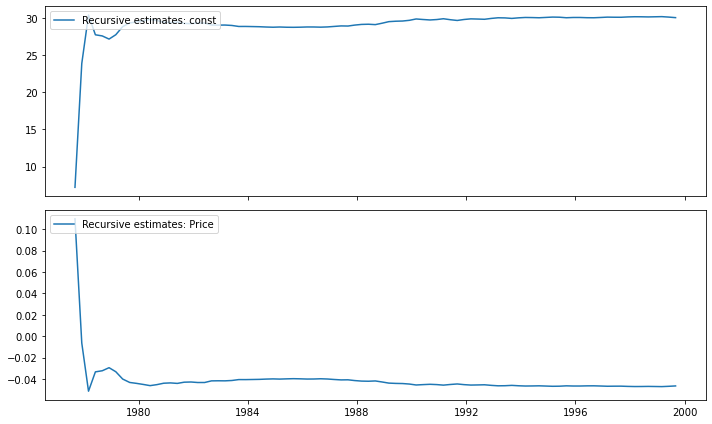

In [28]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6)); 

Por conveniência, verificamos visualmente a estabilidade dos parâmetros usando a função plot_cusum.

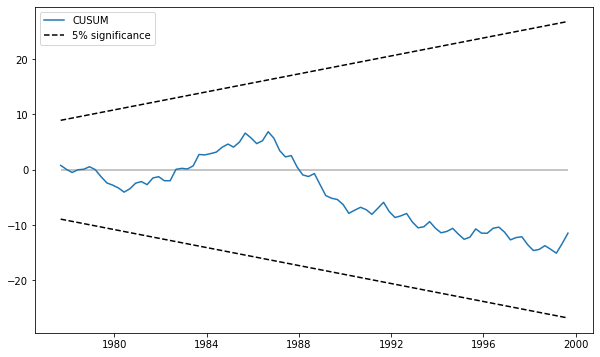

In [29]:
fig = res.plot_cusum(figsize=(10,6))

No gráfico acima, a estatística CUSUM não se move para fora das faixas de significância de 5%, portanto, falhamos em rejeitar a hipótese nula de parâmetros estáveis ​​no nível de 5%.

In [ ]:
Clauder - janeiro de 2019